In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import data_catalog
import tseries_mod
import esmlab_wrap

In [2]:
data_catalog.set_catalog('experiments')

active catalog: experiments


In [3]:
varnames = ['TS', 'SFCO2_LND', 'SFCO2_OCN']

In [4]:
experiment = '1pctCO2-cmip5'
ds_1pctCO2_cmip5 = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0')
ds_1pctCO2_cmip5_ann = esmlab_wrap.compute_ann_mean(ds_1pctCO2_cmip5)
# print(ds_1pctCO2_cmip5_ann)

In [5]:
experiment = '1pctCO2-bgc-cmip5'
ds_1pctCO2_bgc_cmip5 = tseries_mod.tseries_get_vars(varnames, 'atm', experiment, stream='cam2.h0')
ds_1pctCO2_bgc_cmip5_ann = esmlab_wrap.compute_ann_mean(ds_1pctCO2_bgc_cmip5)
# print(ds_1pctCO2_bgc_cmip5_ann)

In [6]:
experiment = '1pctCO2'
ds_1pctCO2 = tseries_mod.tseries_get_vars(varnames, 'atm', experiment)
ds_1pctCO2_ann = esmlab_wrap.compute_ann_mean(ds_1pctCO2)
# print(ds_1pctCO2_ann)

In [7]:
experiment = '1pctCO2-bgc'
ds_1pctCO2_bgc = tseries_mod.tseries_get_vars(varnames, 'atm', experiment)
ds_1pctCO2_bgc_ann = esmlab_wrap.compute_ann_mean(ds_1pctCO2_bgc)
# print(ds_1pctCO2_bgc_ann)

In [8]:
# add cummulate flux vars to datasets
for ds in [ds_1pctCO2_cmip5_ann, ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_ann, ds_1pctCO2_bgc_ann]:
    for varname in ['SFCO2_LND', 'SFCO2_OCN']:
        da = (-1.0) * ds[varname].cumsum(dim='time', keep_attrs=True)
        da.name = varname+'_CUM'
        da.attrs['units'] = 'Pg'
        ds[da.name] = da

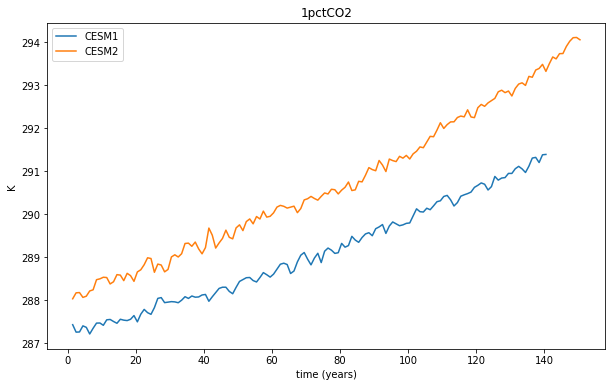

In [9]:
tseries_mod.tseries_plot_1var('TS', [ds_1pctCO2_cmip5_ann, ds_1pctCO2_ann],
                              ['CESM1', 'CESM2'], '1pctCO2', region_val='Global')

(-9.5, 1.5)

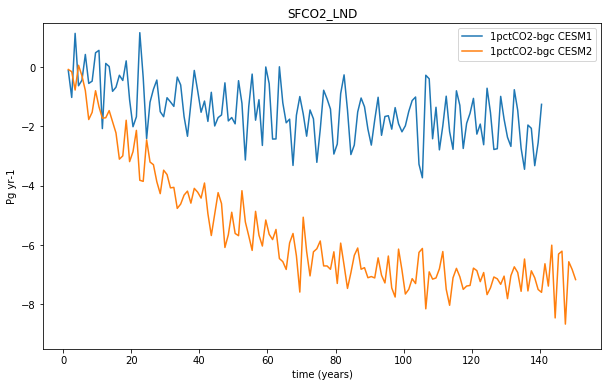

In [10]:
varname = 'SFCO2_LND'
tseries_mod.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                              ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], varname, region_val='Global')
plt.ylim(-9.5, 1.5)

(-600, 1300)

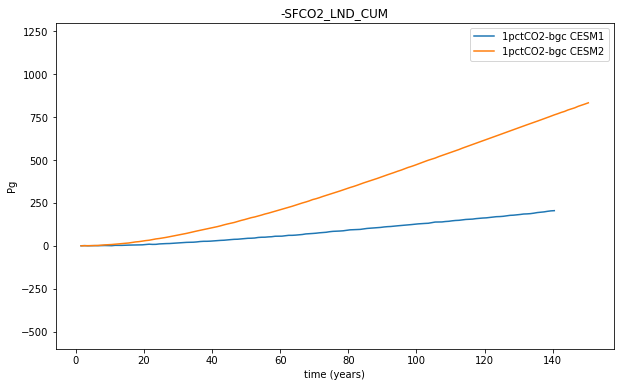

In [11]:
varname = 'SFCO2_LND_CUM'
tseries_mod.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                              ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], '-'+varname, region_val='Global')
plt.ylim(-600, 1300)

(-9.5, 1.5)

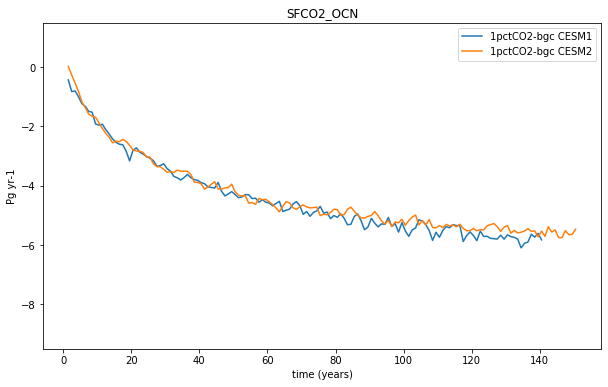

In [12]:
varname = 'SFCO2_OCN'
tseries_mod.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                              ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], varname, region_val='Global')
plt.ylim(-9.5, 1.5)

(-600, 1300)

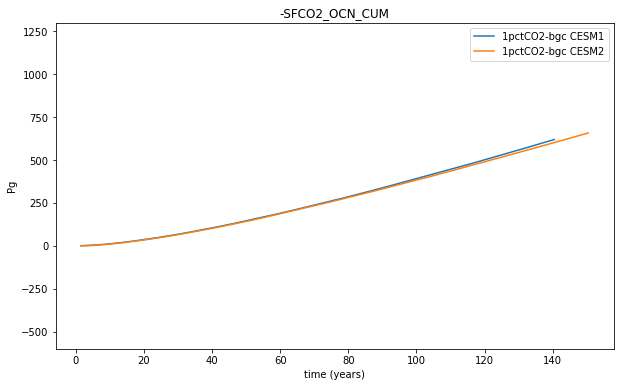

In [13]:
varname = 'SFCO2_OCN_CUM'
tseries_mod.tseries_plot_1var(varname, [ds_1pctCO2_bgc_cmip5_ann, ds_1pctCO2_bgc_ann],
                              ['1pctCO2-bgc CESM1', '1pctCO2-bgc CESM2'], '-'+varname, region_val='Global')
plt.ylim(-600, 1300)